(32, 32)


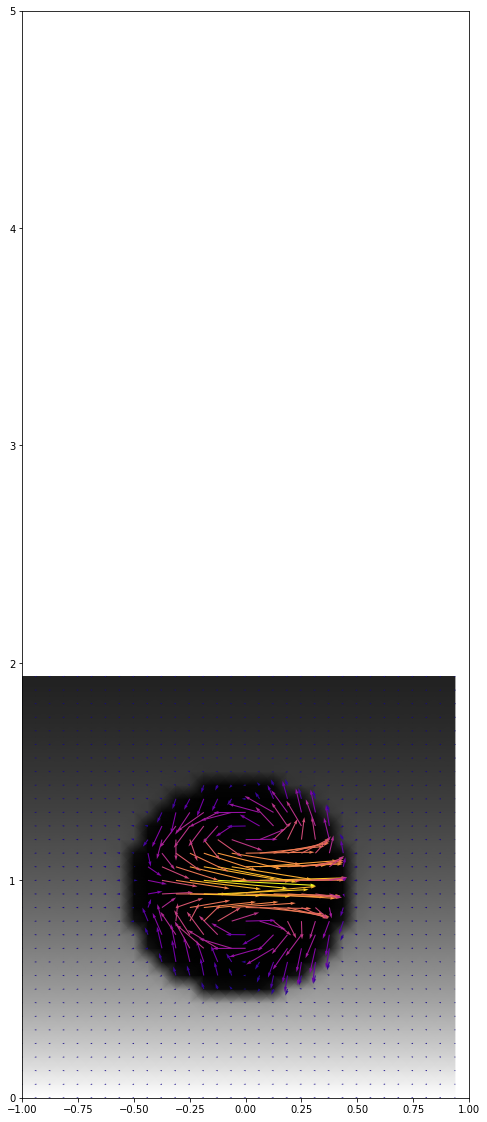

In [1]:
#view slice at y=0 of B field spheromak initial condition

import sys
import time
sys.path.append('/home/asmohov/athena/vis/python/')
sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import athena_read


file_name = '../mag_bubble/rt.block0.out2.00010.vtk'

data = athena_read.vtk(file_name)
#print(data[-1]['rho'])
#position space
x_coords = data[0][:-1]
z_coords = data[2][:-1]
y_coords = data[1][:-1]
#print(data[-1]['Bcc'].shape) mag field slicing
splice = np.array(data[3]['Bcc'])
splice = splice[:,16,:,:]
#print(splice.shape)
#rho slicing
rho_splice = np.array(data[3]['rho'])
rho_splice = rho_splice[:,16,:]
print(rho_splice.shape)

Bx = splice[:,:,0]
By = splice[:,:,1]
Bz = splice[:,:,2]
Bmag = np.sqrt(Bx*Bx+By*By+Bz*Bz)

fig, ax = plt.subplots(figsize=(8,20))
ax.set_xlim(-1,1)
ax.set_ylim(0,5)
ax.pcolormesh(x_coords,z_coords,rho_splice,shading='gouraud',cmap='binary_r')
q = ax.quiver(x_coords,z_coords,Bx, Bz,Bmag,cmap='plasma')

#print(Bx[50,16])
#print(rho_splice[16,0])
plt.show()


passing step  0
passing step  25
passing step  50
passing step  75
passing step  100
passing step  125
passing step  150
passing step  175
passing step  200
passing step  225
passing step  250
passing step  275
Beginning animation
done animating
Run time is  148.76482391357422  seconds
done


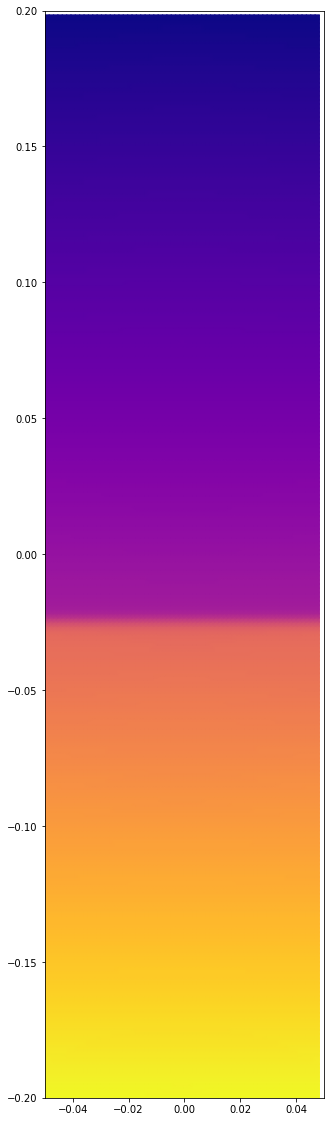

In [49]:
#movie making section
sys.path.append('/home/asmohov/athena/vis/python/')
sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')
import numpy as np
import time
from matplotlib import pyplot as plt
from celluloid import Camera as cam
import ffmpeg
import matplotlib as mpl
import athena_read
import IPython
from base64 import b64encode
start = time.time()
z=[]
fig, ax = plt.subplots(figsize=(5,20))
Cam = cam(fig)
outrange = range(300)
file_path = '../rt_clean'
for i in outrange:
        if z != []:
            z.remove()
        if i<10:
            fname = file_path+'/rt.block0.out2.0000'+str(i)+'.vtk'
        elif 9<i<100:
            fname = file_path+'/rt.block0.out2.000'+str(i)+'.vtk'
        elif 99<i<1000:
            fname = file_path+'/rt.block0.out2.00'+str(i)+'.vtk'
        else:
            fname = file_path+'/rt.block0.out2.0'+str(i)+'.vtk'
        if i%25 == 0:
            print('passing step ',i)
        #print(fname)
       #section to make plot
        data = athena_read.vtk(fname)
        #print(data)
        x_coords = data[0][:-1]
        z_coords = data[2][:-1]
        y_coords = data[1][:-1]#+.03125
        #print(x_coords)
        #splice = np.array(data[3]['Bcc'])
        #print(splice.shape)
        #splice = splice[:,16,:,:]

        rho_splice = np.array(data[3]['rho'])
        rho_splice = rho_splice[:,16,:]
        #print(rho_splice.shape)
        #print(len(x_coords))
        #print(len(z_coords))
        #Bx = splice[:,:,0]
        #By = splice[:,:,1]
        #Bz = splice[:,:,2]
        #print('len bx ',len(Bx))
        #print('len bz ',len(Bz))
        #print('len by ',len(By))
        Bmag = np.sqrt(Bx*Bx+By*By+Bz*Bz)

        #fig, ax = plt.subplots(figsize=(8,8))
        ax.set_xlim(-.05,.05)
        ax.set_ylim(-.2,.2)
        ax.pcolormesh(x_coords,z_coords,rho_splice,shading='gouraud',cmap='plasma')
        #q = ax.quiver(x_coords,z_coords,Bx,Bz,Bmag,cmap='plasma')
        if i%1== 0:
            #print('snapping')
            Cam.snap()
print('Beginning animation')
anim = Cam.animate(blit=False,interval=20)
#writervideo = anim.FFMpegWriter(fps=60)
print('done animating')
anim.save('rt_test.mp4')
#Video("bubble_test.mp4",embed=True)
print('Run time is ',(time.time()-start),' seconds' )
#play video inline
html = ''
video = open("rt_test.mp4",'rb').read()
src = 'data:video/mp4;base64,' + b64encode(video).decode()
html += '<video width=500 controls><source src="%s" type="video/mp4"></video>' % src 
IPython.display.HTML(html)

print('done')


In [ ]:
import IPython
from base64 import b64encode
html = ''
video = open("rt_test.mp4",'rb').read()
src = 'data:video/mp4;base64,' + b64encode(video).decode()
html += '<video width=500 controls><source src="%s" type="video/mp4"></video>' % src 
IPython.display.HTML(html)

/home/asmohov/athena/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


7333
7333


Text(0.5, 0, 'cycle number/100')

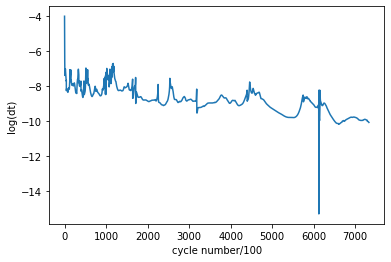

In [208]:
#dt graph

import sys
sys.path.append('~/athena-public-version/vis/python/')
sys.path.append('~/working')
import numpy as np
import matplotlib.pyplot as plt
import athena_read
data = athena_read.hst('../mag_bubble/rt.hst')

dt = data['dt']
y_vals=np.log10(dt)

print(len(y_vals))
x_vals = range(len(y_vals))
print(len(x_vals))

plt.plot(x_vals,y_vals)
plt.ylabel('log(dt)')
plt.xlabel('cycle number/100')